In [13]:
import netCDF4 as nc
from salishsea_tools import nc_tools
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

resultsDir='/data/eolson/MEOPAR/SS2D/run2/'

fname='SalishSea_1h_20020915_20020916_ptrc_T.nc'

In [14]:
f=nc.Dataset(os.path.join(resultsDir,fname))
lons=f.variables['nav_lon'][1,:]
lats=f.variables['nav_lat'][:,1]
z=f.variables['deptht'][:]

xx,zz=np.meshgrid(lons,-z[:])
xt,yt=np.meshgrid(lons,lats)

In [15]:
print f.variables['DIC']

<type 'netCDF4.Variable'>
float32 DIC(time_counter, deptht, y, x)
    units: mmol/m3
    standard_name: Dissolved inorganic Concentration
    _FillValue: 9.96921e+36
    long_name: Dissolved inorganic Concentration
    online_operation: ave(X)
    interval_operation: 10.0
    interval_write: 3600.0
    coordinates: time_counter deptht nav_lat nav_lon
unlimited dimensions: time_counter
current shape = (48, 40, 10, 1100)
filling off



In [16]:
fkeys=f.variables.keys()
ikey=fkeys[6]
print ikey

Alkalini


In [36]:
test=np.amax(ivar)
print test
test2=np.amin(np.nonzero(ivar))
print test2
temp=np.where(ivar!=0)
test3=np.amin(ivar[np.where(ivar!=0)])
print test3


2423.3
0
6.73056


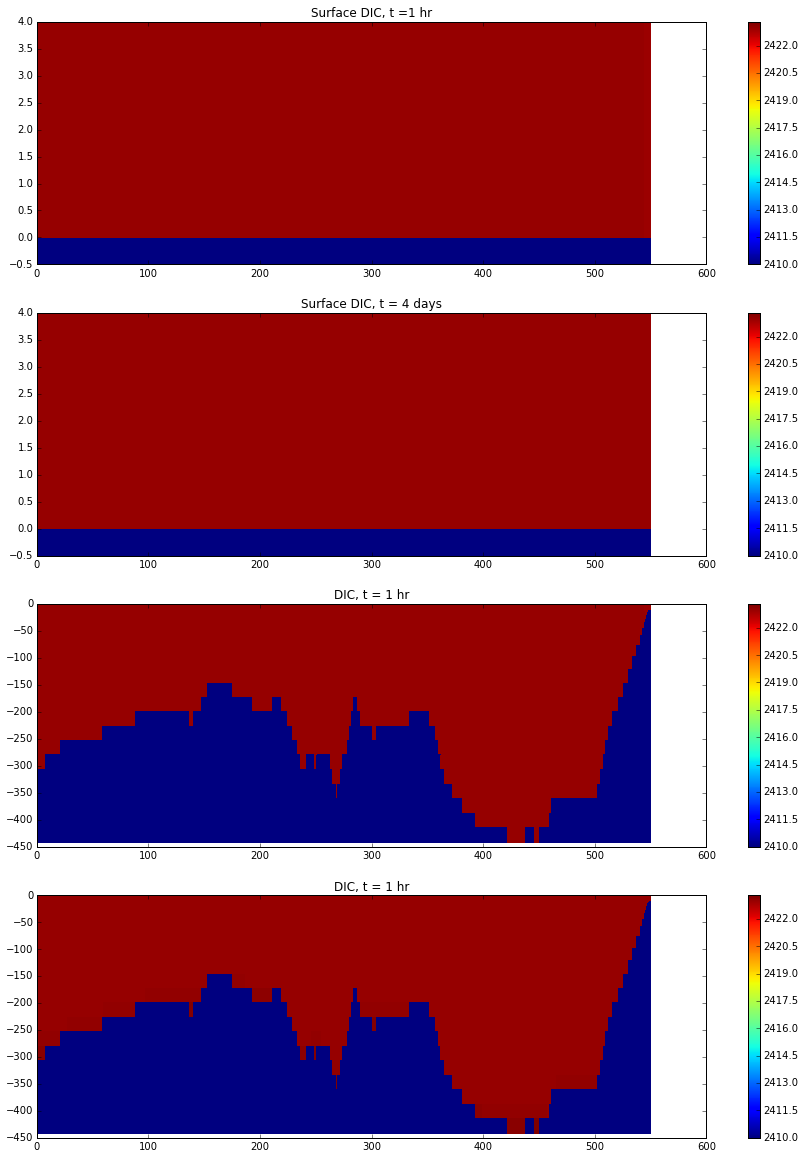

In [40]:
# loop  through variables and plot them each in a figure
#var1=np.copy(f.variables['DIC'])
if np.ndim(f.variables[ikey])==4:
    ivar=f.variables[ikey]
    #ivmin=np.amin(ivar[np.where(ivar!=0)])
    ivmin=2410
    ivmax=np.amax(ivar)
    fig, axs = plt.subplots(4,1,figsize=(15,20))

    mesh0=axs[0].pcolormesh(xt,yt,ivar[0,0,:,:],vmin=ivmin,vmax=ivmax)
    axs[0].set_title('Surface DIC, t =1 hr')
    fig.colorbar(mesh0,ax=axs[0])

    mesh1=axs[1].pcolormesh(xt,yt,ivar[ivar.shape[0]-1,0,:,:],vmin=ivmin,vmax=ivmax)
    axs[1].set_title('Surface DIC, t = 4 days')
    fig.colorbar(mesh1,ax=axs[1])

    mesh2=axs[2].pcolormesh(xx,zz,ivar[0,:,4,:],vmin=ivmin,vmax=ivmax)
    axs[2].set_title('DIC, t = 1 hr')
    fig.colorbar(mesh2,ax=axs[2])

    mesh3=axs[3].pcolormesh(xx,zz,ivar[ivar.shape[0]-1,:,4,:],vmin=ivmin,vmax=ivmax)
    axs[3].set_title('DIC, t = 1 hr')
    fig.colorbar(mesh3,ax=axs[3])

In [31]:
print test

[u'nav_lon', u'nav_lat', u'deptht', u'time_counter', u'time_counter_bnds', u'DIC', u'Alkalini', u'O2', u'CaCO3', u'PO4', u'POC', u'Si', u'PHY', u'ZOO', u'DOC', u'PHY2', u'ZOO2', u'DSi', u'Fer', u'BFe', u'GOC', u'SFe', u'DFe', u'GSi', u'NFe', u'NCHL', u'DCHL', u'NO3', u'NH4']


In [32]:
for k in test:
    print k

nav_lon
nav_lat
deptht
time_counter
time_counter_bnds
DIC
Alkalini
O2
CaCO3
PO4
POC
Si
PHY
ZOO
DOC
PHY2
ZOO2
DSi
Fer
BFe
GOC
SFe
DFe
GSi
NFe
NCHL
DCHL
NO3
NH4


In [33]:
test[2]

u'deptht'

In [34]:
print test[2]

deptht


In [41]:
for k in test:
    var = np.copy(f.variables[k])
    print var.ndim

2
2
1
1
2
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


In [43]:
for k in test:

        print np.ndim(f.variables[k])

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
